In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nrclex import NRCLex
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline


In [24]:
train = pd.read_csv('Analized.csv')
org=train
train.head()


,id,text,class,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,class_num
0,2,Ex Wife Threatening DepressedRecently I left m...,Depressed,0.096154,0.096154,0.0,0.096154,0.096154,0.096154,0.153846,0.076923,0.057692,0.096154,0.134615,1
1,3,Am I weird I don't get affected by compliments...,non-Depressed,0.000000,0.000000,0.0,0.125000,0.125000,0.125000,0.125000,0.000000,0.125000,0.125000,0.250000,0
2,4,Finally 2020 is almost over... So I can never ...,non-Depressed,0.111111,0.222222,0.0,0.111111,0.000000,0.111111,0.222222,0.111111,0.111111,0.000000,NaN,0
3,8,i need helpjust help me im crying so hard,Depressed,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,NaN,1
4,9,"Iâm so lostHello, my name is Adam (16) and I...",Depressed,0.152439,0.109756,0.0,0.054878,0.030488,0.067073,0.213415,0.158537,0.060976,0.036585,0.115854,1


In [25]:
train.isnull().head()

,id,text,class,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation,class_num
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

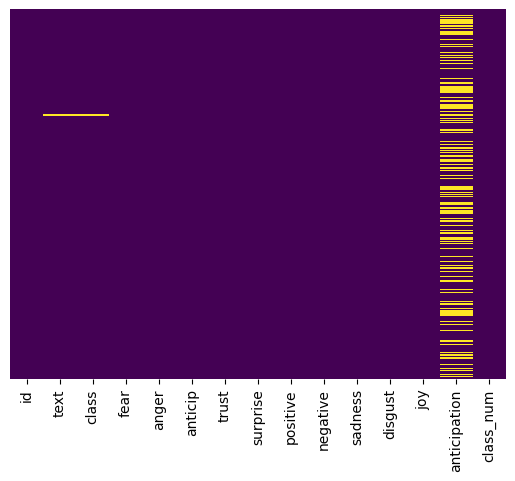

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
train.drop('anticipation',axis=1,inplace=True)


<AxesSubplot: >

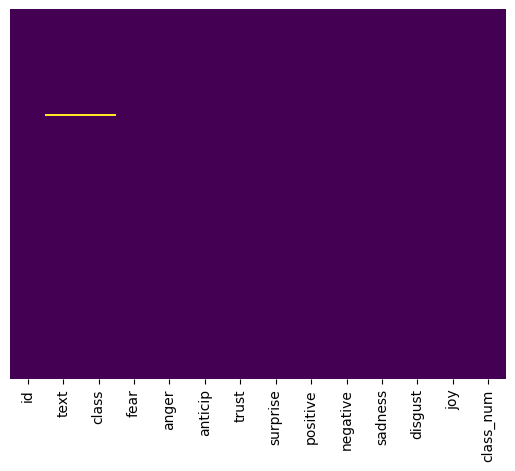

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
del train['text']
del train['class']
test=train.drop('id',axis=1)


In [30]:
train=train.drop('id',axis=1)
X = train.drop('class_num',axis=1)
y = train['class_num']
train.head()

,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,class_num
0,0.096154,0.096154,0.0,0.096154,0.096154,0.096154,0.153846,0.076923,0.057692,0.096154,1
1,0.000000,0.000000,0.0,0.125000,0.125000,0.125000,0.125000,0.000000,0.125000,0.125000,0
2,0.111111,0.222222,0.0,0.111111,0.000000,0.111111,0.222222,0.111111,0.111111,0.000000,0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1
4,0.152439,0.109756,0.0,0.054878,0.030488,0.067073,0.213415,0.158537,0.060976,0.036585,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [33]:
logmodel.score(X_train,y_train)

0.7108288442703232

In [34]:
logmodel.score(X_test,y_test)

0.7095212249328686

In [36]:
test_x = test.drop('class_num',axis=1)

In [37]:

predictions = logmodel.predict(test_x)

In [40]:
final_prediction = pd.DataFrame({'Id':org['id'],'Predicted Result':predictions,'Original result':org['class_num']})

In [41]:
#sucide=1
#non-sucide=0
final_prediction.head(10)

,Id,Predicted Result,Original result
0,2,1,1
1,3,0,0
2,4,1,0
3,8,1,1
4,9,1,1
5,11,1,1
6,12,0,1
7,13,0,1
8,16,0,0
9,18,1,1


In [42]:
x="I am very much happy today!!"
a=NRCLex(x).affect_frequencies

new_df = pd.DataFrame(a, index=[''])
new_df.head()
del new_df['anticipation']
predictions = logmodel.predict(new_df)
final_prediction = pd.DataFrame({'Predicted Result':predictions})




In [44]:
if(final_prediction.iat[0,0]==1):
    final_prediction['Statement']='Depressed'
else:
    final_prediction['Stetement']='Non-Depressed'

final_prediction

    


,Predicted Result,Stetement
0,0,Non-Depressed
